Found 52 images belonging to 8 classes.
Found 10 images belonging to 8 classes.


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 741ms/step - accuracy: 0.1442 - loss: 2.1907 - val_accuracy: 0.3000 - val_loss: 1.9486
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 500ms/step - accuracy: 0.1949 - loss: 1.9577 - val_accuracy: 0.2000 - val_loss: 1.9371
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.2652 - loss: 1.9168 - val_accuracy: 0.1000 - val_loss: 1.8979
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step - accuracy: 0.2923 - loss: 1.8773 - val_accuracy: 0.1000 - val_loss: 1.8505
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - accuracy: 0.3141 - loss: 1.6980 - val_accuracy: 0.1000 - val_loss: 1.8935
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step - accuracy: 0.2885 - loss: 1.7073 - val_accuracy: 0.4000 - val_loss: 1.5872
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step - accuracy: 0.3103 - loss: 1.6811 - val_accuracy: 0.4000 - val_loss: 1.9260
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 380ms/step - accuracy: 0.3429 - loss: 1.7382 - val_accuracy: 0.4000 - val_loss:

✅ Model saved at C:\Users\sagni\Downloads\Image Metadata Extractor\image_classifier_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step

📊 Classification Report:
              precision    recall  f1-score   support

    airplane       1.00      1.00      1.00         1
         car       1.00      1.00      1.00         2
         cat       0.00      0.00      0.00         1
         dog       0.00      0.00      0.00         1
       fruit       0.33      0.50      0.40         2
   motorbike       0.67      1.00      0.80         2
        star       0.00      0.00      0.00         1

    accuracy                           0.60        10
   macro avg       0.43      0.50      0.46        10
weighted avg       0.50      0.60      0.54        10


📉 Confusion Matrix:
[[1 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 1 0 1]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0]]


C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\sagni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

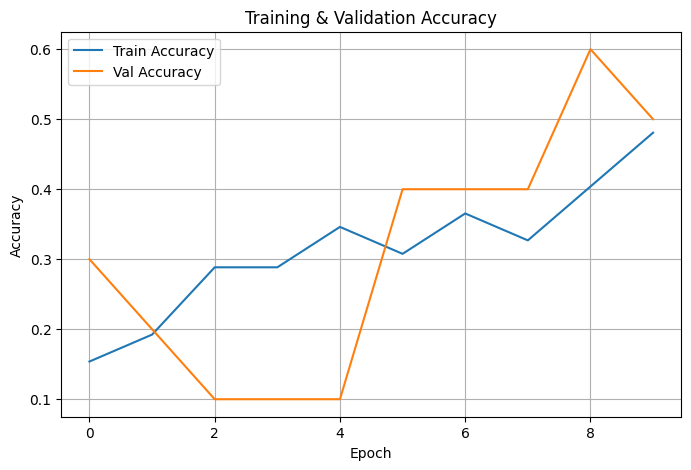

In [4]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# === Paths ===
base_dir = r"C:\Users\sagni\Downloads\Image Metadata Extractor\Images"

# === Image Size and Parameters ===
img_height, img_width = 150, 150
batch_size = 32
epochs = 10

# === Data Generators ===
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# === Model ===
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# === Train ===
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator
)

# === Save model ===
model_path = r"C:\Users\sagni\Downloads\Image Metadata Extractor\image_classifier_model.h5"
model.save(model_path)
print(f"✅ Model saved at {model_path}")

# === Evaluation ===
val_generator.reset()
preds = model.predict(val_generator)
predicted_classes = np.argmax(preds, axis=1)
true_classes = val_generator.classes

# Label mapping
class_indices = val_generator.class_indices
index_to_class = {v: k for k, v in class_indices.items()}
unique_classes = np.unique(true_classes)
target_names = [index_to_class[i] for i in unique_classes]

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_classes, predicted_classes, labels=unique_classes, target_names=target_names))

# Confusion Matrix
print("\n📉 Confusion Matrix:")
print(confusion_matrix(true_classes, predicted_classes, labels=unique_classes))

# === Optional: Accuracy Plot ===
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
